# CM3070 FYP- FAKE NEWS DETECTION USING NLP

### Basic Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
# load the dataset
news_d = pd.read_csv("train.csv")

In [ ]:
print("Shape of News data:", news_d.shape)
print("News data columns", news_d.columns)

Shape of News data: (20800, 5)
News data columns Index(['id', 'title', 'author', 'text', 'label'], dtype='object')


In [ ]:
# by using df.head(), we can immediately familiarize ourselves with the dataset. 
news_d.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


### Distribution of Dataset

1: Unreliable
0: Reliable
Distribution of labels:
1    10413
0    10387
Name: label, dtype: int64


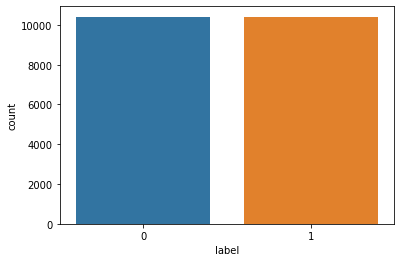

In [ ]:
sns.countplot(x="label", data=news_d);
print("1: Unreliable")
print("0: Reliable")
print("Distribution of labels:")
print(news_d.label.value_counts());

As we can see, the training dataset has a balanced distribution of classes.

### Data Cleaning

In [ ]:
# Constants that are used to sanitize the datasets 

column_n = ['id', 'title', 'author', 'text', 'label']
remove_c = ['id','author']
categorical_features = []
target_col = ['label']
text_f = ['title', 'text']

In [ ]:
# Clean Datasets
import nltk
from nltk.corpus import stopwords
import re
from nltk.stem.porter import PorterStemmer
from collections import Counter

ps = PorterStemmer()
wnl = nltk.stem.WordNetLemmatizer()

stop_words = stopwords.words('english')
stopwords_dict = Counter(stop_words)

# Removed unused columns
def remove_unused_c(df,column_n=remove_c):
    df = df.drop(column_n,axis=1)
    return df

# Impute null values with None
def null_process(feature_df):
    for col in text_f:
        feature_df.loc[feature_df[col].isnull(), col] = "None"
    return feature_df

def clean_dataset(df):
    # remove unused column
    df = remove_unused_c(df)
    #impute null values
    df = null_process(df)
    return df

# Cleaning text from unused characters
def clean_text(text):
    text = str(text).replace(r'http[\w:/\.]+', ' ')  # removing urls
    text = str(text).replace(r'[^\.\w\s]', ' ')  # remove everything but characters and punctuation
    text = str(text).replace('[^a-zA-Z]', ' ')
    text = str(text).replace(r'\s\s+', ' ')
    text = text.lower().strip()
    #text = ' '.join(text)    
    return text

## Nltk Preprocessing include:
# Stop words, Stemming and Lemmetization
# For our project we use only Stop word removal
def nltk_preprocess(text):
    text = clean_text(text)
    wordlist = re.sub(r'[^\w\s]', '', text).split()
    #text = ' '.join([word for word in wordlist if word not in stopwords_dict])
    #text = [ps.stem(word) for word in wordlist if not word in stopwords_dict]
    text = ' '.join([wnl.lemmatize(word) for word in wordlist if word not in stopwords_dict])
    return  text

Above are functions for data cleaning in NLP such as removal of stopwords, replacing null values with 'None', stemming and lemmetization. 

In [ ]:
# Perform data cleaning on train and test dataset by calling clean_dataset function
df = clean_dataset(news_d)
# apply preprocessing on text through apply method by calling the function nltk_preprocess
df["text"] = df.text.apply(nltk_preprocess)
# apply preprocessing on title through apply method by calling the function nltk_preprocess
df["title"] = df.title.apply(nltk_preprocess)

## Data Exploration

### WordClouds

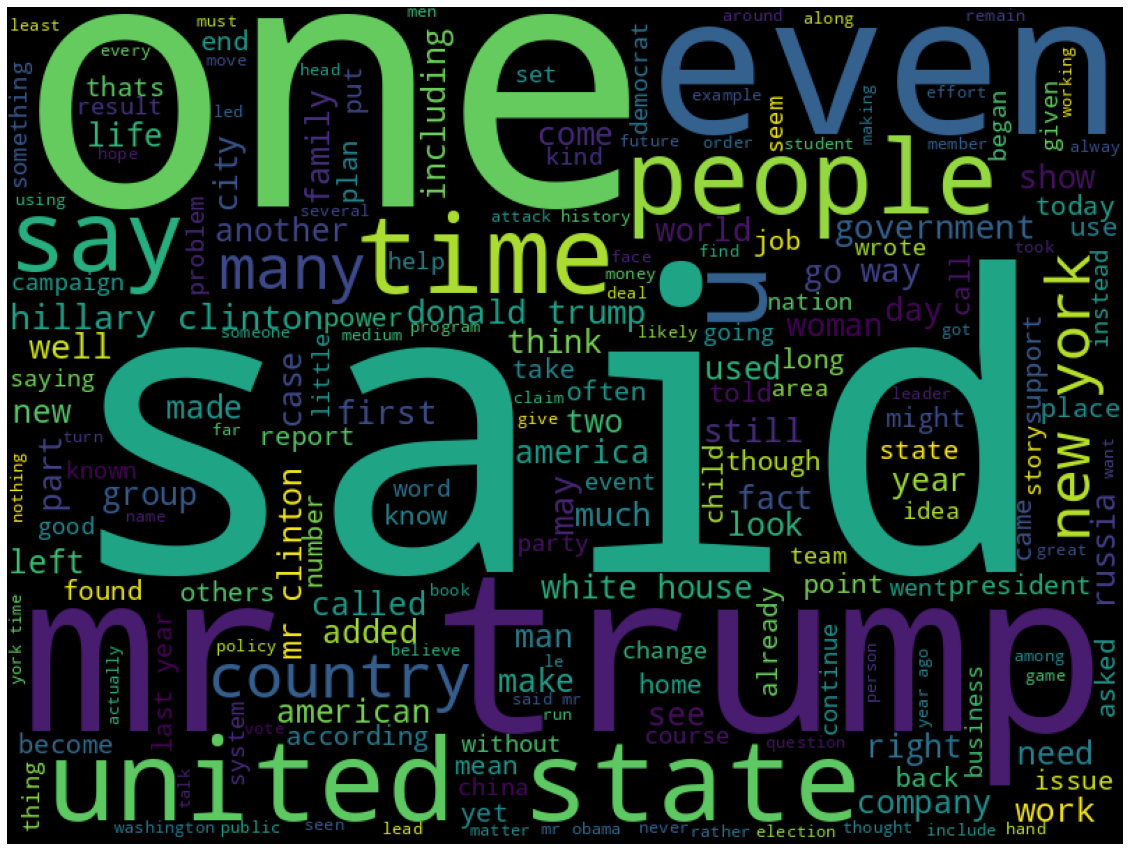

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# initialize the word cloud
wordcloud = WordCloud( background_color='black', width=800, height=600)
# generate the word cloud by passing the corpus
text_cloud = wordcloud.generate(' '.join(df['text']))
# plotting the word cloud
plt.figure(figsize=(20,30))
plt.imshow(text_cloud)
plt.axis('off')
plt.show()

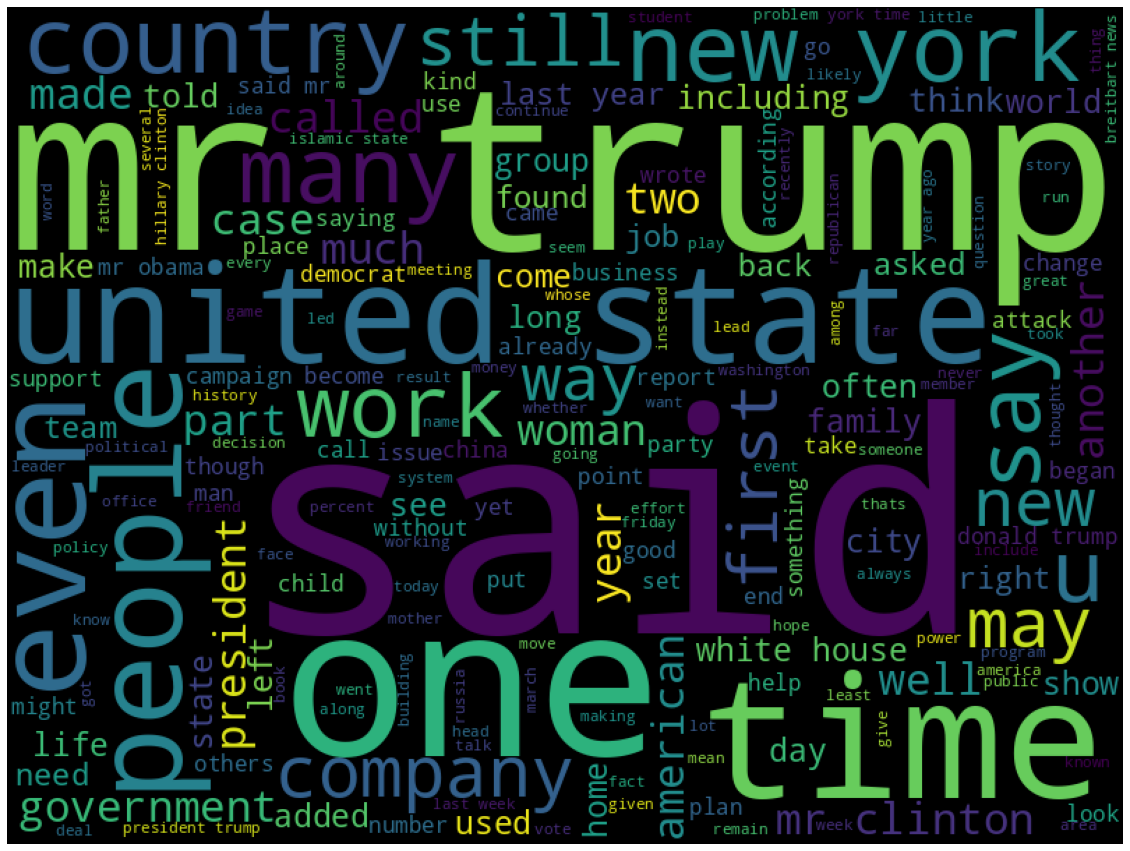

In [ ]:
true_n = ' '.join(df[df['label']==0]['text']) 
wc = wordcloud.generate(true_n)
plt.figure(figsize=(20,30))
plt.imshow(wc)
plt.axis('off')
plt.show()

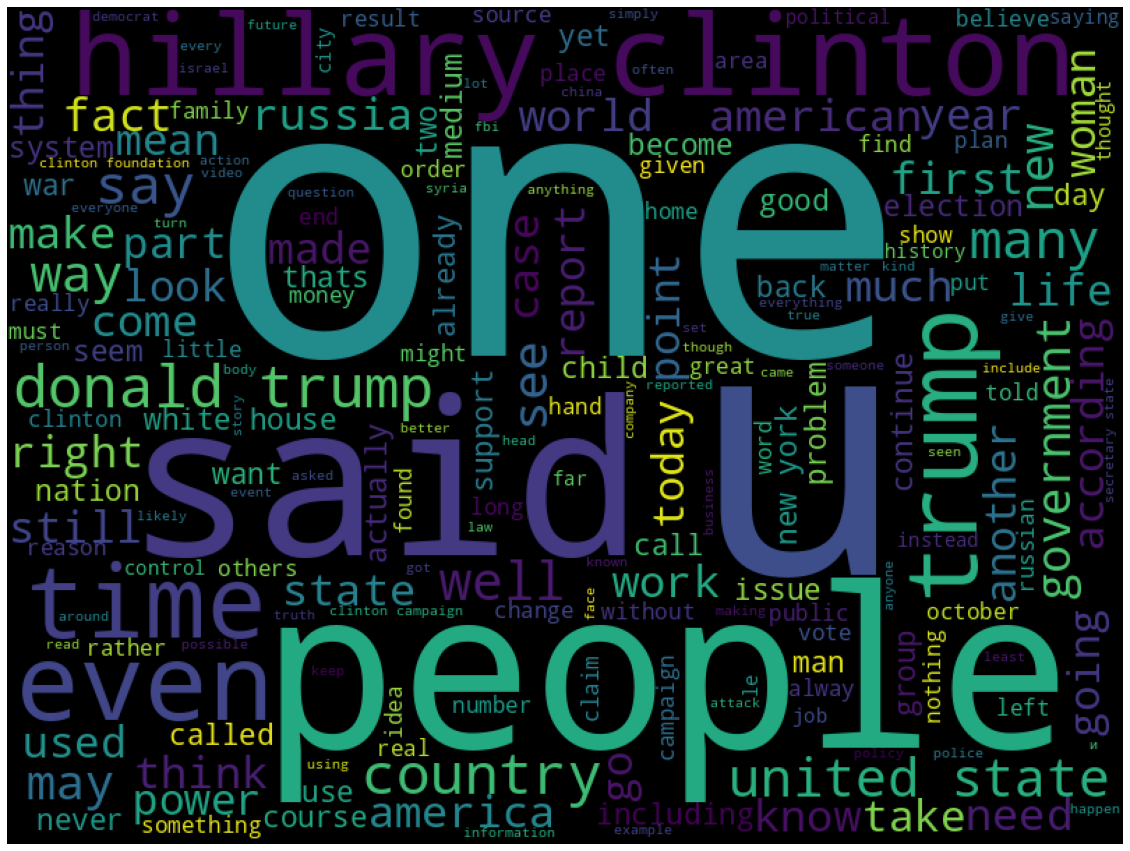

In [ ]:
fake_n = ' '.join(df[df['label']==1]['text'])
wc= wordcloud.generate(fake_n)
plt.figure(figsize=(20,30))
plt.imshow(wc)
plt.axis('off')
plt.show()

### Most used N-Grams

In [ ]:
def plot_top_ngrams(corpus, title, ylabel, xlabel="Number of Occurences", n=2):
  """Utility function to plot top n-grams"""
  true_b = (pd.Series(nltk.ngrams(corpus.split(), n)).value_counts())[:20]
  true_b.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
  plt.title(title)
  plt.ylabel(ylabel)
  plt.xlabel(xlabel)
  plt.show()

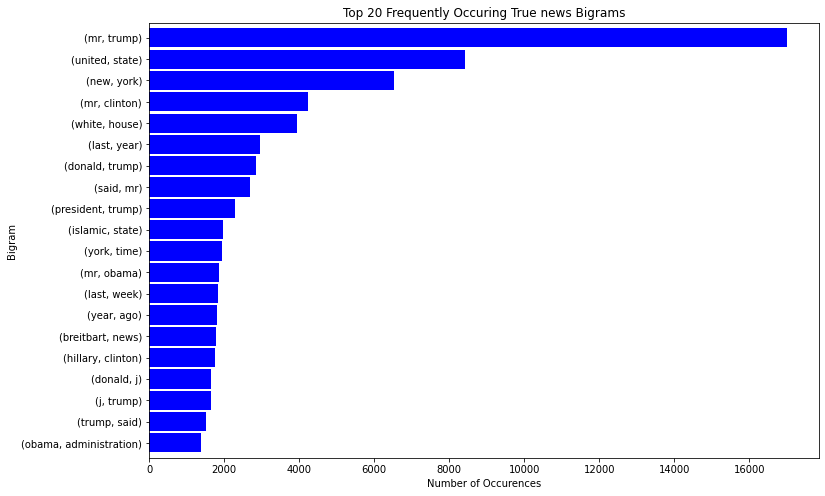

In [ ]:
plot_top_ngrams(true_n, 'Top 20 Frequently Occuring True news Bigrams', "Bigram", n=2)

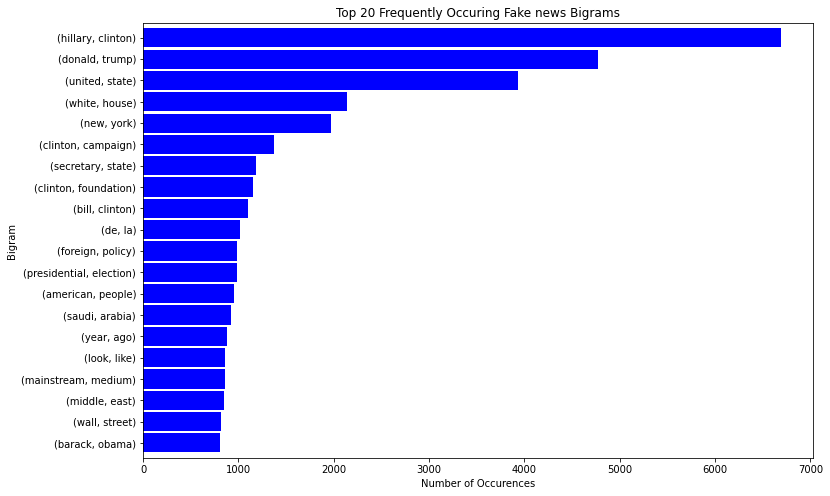

In [ ]:
plot_top_ngrams(fake_n, 'Top 20 Frequently Occuring Fake news Bigrams', "Bigram", n=2)

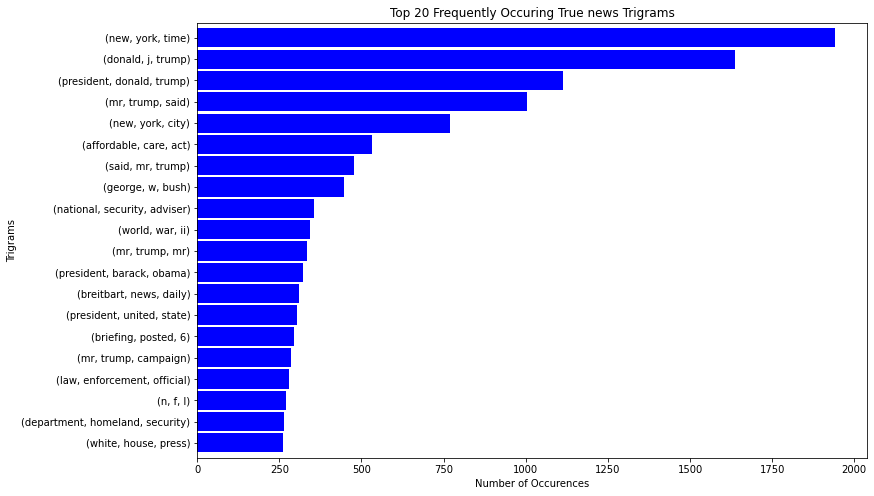

In [ ]:
plot_top_ngrams(true_n, 'Top 20 Frequently Occuring True news Trigrams', "Trigrams", n=3)

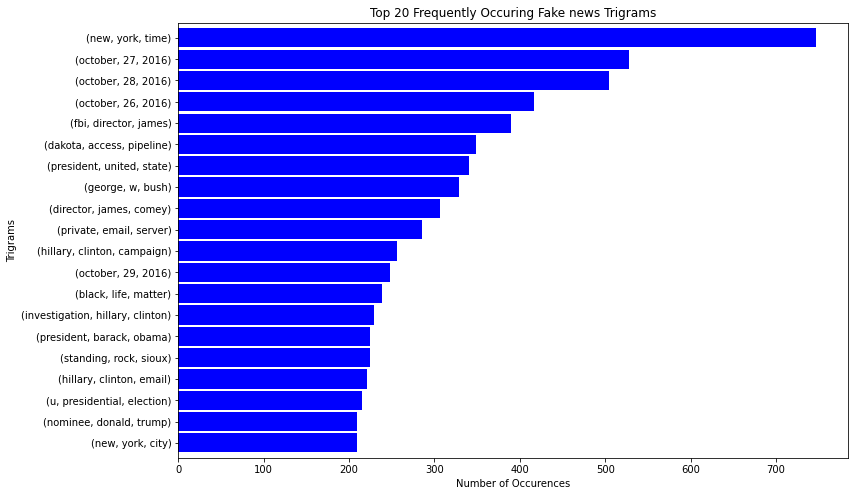

In [ ]:
plot_top_ngrams(fake_n, 'Top 20 Frequently Occuring Fake news Trigrams', "Trigrams", n=3)

### Install the necessary packages for BERT

In [ ]:
import torch
from transformers.file_utils import is_tf_available, is_torch_available, is_torch_tpu_available
from transformers import BertTokenizerFast, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
import numpy as np
from sklearn.model_selection import train_test_split

import random

In [ ]:
def set_seed(seed: int):
    """
    Helper function for reproducible behavior to set the seed in ``random``, ``numpy``, ``torch`` and/or ``tf`` (if
    installed).

    Args:
        seed (:obj:`int`): The seed to set.
    """
    random.seed(seed)
    np.random.seed(seed)
    if is_torch_available():
        torch.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        # ^^ safe to call this function even if cuda is not available
    if is_tf_available():
        import tensorflow as tf

        tf.random.set_seed(seed)

set_seed(1)

### Data Preparation

In [ ]:
# Load the model that we are gonna train, base uncased BERT
model_name = "bert-base-uncased"
# max sequence length for each document/sentence sample
max_length = 512

In [ ]:
# load the tokenizer
tokenizer = BertTokenizerFast.from_pretrained(model_name, do_lower_case=True)

In [ ]:
#Clean the NaN values in the text, author and title columns from the dataset 
news_df = news_d[news_d['text'].notna()]
news_df = news_df[news_df["author"].notna()]
news_df = news_df[news_df["title"].notna()]

### Feature Extraction: Converting the text into BERT input format. BERT requires input in a specific format, where each input consists of three parts: input IDs, attention mask, and segments of exact same length.

In [ ]:
#Function that takes the dataset as a Pandas dataframe and returns the train/validation splits of texts and labels as lists
def prepare_data(df, test_size=0.2, include_title=True, include_author=True):
  texts = []
  labels = []
  for i in range(len(df)):
    text = df["text"].iloc[i]
    label = df["label"].iloc[i]
    if include_title:
      text = df["title"].iloc[i] + " - " + text
    if include_author:
      text = df["author"].iloc[i] + " : " + text
    if text and label in [0, 1]:
      texts.append(text)
      labels.append(label)
  return train_test_split(texts, labels, test_size=test_size)

train_texts, valid_texts, train_labels, valid_labels = prepare_data(news_df)

The above function takes the dataset and converts it into a Pandas dataframe and returns the train/validation splits of texts and labels as lists.

In [ ]:
# tokenize the dataset, truncate when passed `max_length`, 
# and pad with 0's when less than `max_length`
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=max_length)
valid_encodings = tokenizer(valid_texts, truncation=True, padding=True, max_length=max_length)

We can use the BERT tokenizer to convert the lists into the appropriate BERT input format. In addition, we pad the segments that are too short with zeros in order for all segments to be of the same length.

In [ ]:
#Converting our tokenized data into a PyTorch Dataset for use in our model
class NewsGroupsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item["labels"] = torch.tensor([self.labels[idx]])
        return item

    def __len__(self):
        return len(self.labels)

# convert our tokenized data into a torch Dataset
train_dataset = NewsGroupsDataset(train_encodings, train_labels)
valid_dataset = NewsGroupsDataset(valid_encodings, valid_labels)

Function to convert the tokenized lists into a PyTorch Dataset that our model can use.

In [ ]:
# load the model
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
from sklearn.metrics import accuracy_score
#Callback function to calculate the accuracy on each validation step
def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  # calculate accuracy using sklearn's function
  acc = accuracy_score(labels, preds)
  return {
      'accuracy': acc,
  }

In [ ]:
#Initialize the training Parameters
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=1,              # total number of training epochs
    per_device_train_batch_size=10,  # batch size per device during training
    per_device_eval_batch_size=20,   # batch size for evaluation
    warmup_steps=100,                # number of warmup steps for learning rate scheduler
    logging_dir='./logs',            # directory for storing logs
    load_best_model_at_end=True,     # load the best model when finished training (default metric is loss)
    # but you can specify `metric_for_best_model` argument to change to accuracy or other metric
    logging_steps=200,               # log & save weights each logging_steps
    save_steps=200,
    evaluation_strategy="steps",     # evaluate each `logging_steps`
)

In [ ]:
#Instantiate the trainer:
trainer = Trainer(
    model=model,                         # the instantiated Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=valid_dataset,          # evaluation dataset
    compute_metrics=compute_metrics,     # the callback that computes metrics of interest
)

### Model Training: Train the BERT model on a dataset of labeled fake and real news.

In [ ]:
#Train the model
trainer.train()

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 14628
  Num Epochs = 1
  Instantaneous batch size per device = 10
  Total train batch size (w. parallel, distributed & accumulation) = 10
  Gradient Accumulation steps = 1
  Total optimization steps = 1463
  Number of trainable parameters = 109483778


Step,Training Loss,Validation Loss,Accuracy
200,0.250900,0.100243,0.983867
400,0.031400,0.017256,0.997266
600,0.038300,0.057950,0.989882
800,0.013800,0.012351,0.997812
1000,0.015800,0.008471,0.998086
1200,0.012200,0.008276,0.998359
1400,0.003200,0.011155,0.998086


***** Running Evaluation *****
  Num examples = 3657
  Batch size = 20
Saving model checkpoint to ./results/checkpoint-200
Configuration saved in ./results/checkpoint-200/config.json
Model weights saved in ./results/checkpoint-200/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 3657
  Batch size = 20
Saving model checkpoint to ./results/checkpoint-400
Configuration saved in ./results/checkpoint-400/config.json
Model weights saved in ./results/checkpoint-400/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 3657
  Batch size = 20
Saving model checkpoint to ./results/checkpoint-600
Configuration saved in ./results/checkpoint-600/config.json
Model weights saved in ./results/checkpoint-600/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 3657
  Batch size = 20
Saving model checkpoint to ./results/checkpoint-800
Configuration saved in ./results/checkpoint-800/config.json
Model weights saved in ./results/checkpoint-800/pytorch_model.bin
****

TrainOutput(global_step=1463, training_loss=0.050364318280210256, metrics={'train_runtime': 2337.2843, 'train_samples_per_second': 6.259, 'train_steps_per_second': 0.626, 'total_flos': 3848788517806080.0, 'train_loss': 0.050364318280210256, 'epoch': 1.0})

### Model Evaluation: Evaluate the performance of the BERT model

In [ ]:
#Evaluate the model after training
trainer.evaluate()

***** Running Evaluation *****
  Num examples = 3657
  Batch size = 20


{'eval_loss': 0.008275562897324562,
 'eval_accuracy': 0.9983593109105825,
 'eval_runtime': 121.1259,
 'eval_samples_per_second': 30.192,
 'eval_steps_per_second': 1.511,
 'epoch': 1.0}

In [ ]:
#Saving the fine tuned model & tokenizer
model_path = "fake-news-bert-base-uncased"
model.save_pretrained(model_path)
tokenizer.save_pretrained(model_path)

Configuration saved in fake-news-bert-base-uncased/config.json
Model weights saved in fake-news-bert-base-uncased/pytorch_model.bin
tokenizer config file saved in fake-news-bert-base-uncased/tokenizer_config.json
Special tokens file saved in fake-news-bert-base-uncased/special_tokens_map.json


('fake-news-bert-base-uncased/tokenizer_config.json',
 'fake-news-bert-base-uncased/special_tokens_map.json',
 'fake-news-bert-base-uncased/vocab.txt',
 'fake-news-bert-base-uncased/added_tokens.json',
 'fake-news-bert-base-uncased/tokenizer.json')

### Make predictions: Using the trained BERT model to make predictions on new text data.

In [ ]:
#Function that accepts the article text as an argument and returns whether it's fake or not, to test our model's prediction ability
def get_prediction(text, convert_to_label=False):
    # prepare our text into tokenized sequence
    inputs = tokenizer(text, padding=True, truncation=True, max_length=max_length, return_tensors="pt").to("cuda")
    # perform inference to our model
    outputs = model(**inputs)
    # get output probabilities by doing softmax
    probs = outputs[0].softmax(1)
    # executing argmax function to get the candidate label
    d = {
        0: "reliable",
        1: "fake"
    }
    if convert_to_label:
      return d[int(probs.argmax())]
    else:
      return int(probs.argmax())

In [ ]:
real_news = """
Tim Tebow Will Attempt Another Comeback, This Time in Baseball - The New York Times",Daniel Victor,"If at first you don’t succeed, try a different sport. Tim Tebow, who was a Heisman   quarterback at the University of Florida but was unable to hold an N. F. L. job, is pursuing a career in Major League Baseball. <SNIPPED>
"""

In [ ]:
fake_news = "During the Monday version of his Fox Sports Radio show â€œOutkick the Coverage,â€ host Clay Travis reacted to the new Nike ad that promotes equality â€œeverywhere,â€ pointing out how â€œhypocriticalâ€ the company is for paying its Indonesian workers   what American factory workers make doing the same job.  â€œNike is making money hand over fist because theyâ€™re only paying their workers three dollars a day to make them in Indonesia,â€ Travis stated. â€œIf equality is everywhere, doesnâ€™t Nike actually have to treat its employees equally? Doesnâ€™t Nike have to actually bring its brand to American shores and make this sneaker inside of our borders and actually pay people in America to make a shoe theyâ€™re asking people to buy?â€ â€œDonâ€™t you think itâ€™s a little bit hypocritical for Nike to say that equality is everywhere when itâ€™s paying workers overseas   of what they would have to pay for an American to make this?â€ he added. Travis went on to call what Nike has with its Indonesian employees â€œIndonesian virtual slave labor. â€ â€œI guess everybodyâ€™s equal and there are no boundaries as long as you donâ€™t live in Indonesia,â€ he concluded. Follow Trent Baker on Twitter @MagnifiTrent"

In [ ]:
get_prediction(real_news, convert_to_label=True)

'reliable'

In [ ]:
get_prediction(fake_news, convert_to_label=True)

'fake'